## 모듈 임포트

In [1]:
from modules.company_info import CompanyInfo

comp_info = CompanyInfo()

In [34]:
# 긍정/부정 뉴스양 시각화 함수
def visualize_news_sentiment(news_df):
    news_df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(4, 4))

# 네이버 정보 탐색/ 요약

## 회사 정보/리뷰 검색

In [2]:
naver_info = comp_info.get_company_info('네이버')

naver_news, naver_reviews, naver_review_summarized_dict = naver_info

2023-07-07 08:27:23.748524: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-07 08:27:24.266118: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## 긍정/ 부정 리뷰 한줄 요약

In [3]:
naver_review_summarized_dict['good_summarise_long']

'한국에서 가장 큰 IT회사라는 네임벨류가 있다.'

In [4]:
naver_review_summarized_dict['bad_summarise_long']

'회사가 너무 많은 일을 하고 있다.'

## 최근 기사 링크/ 기사요약/ 기사 평가

In [7]:
naver_news[['link', 'summarized', 'sentiment']].head(10)

,link,summarized,sentiment
0,http://v.daum.net/v/20230706145703665,네이버가 지난 2분기 최대 규모로 약 19만원대로 진입했다.,positive
1,http://v.daum.net/v/20230707040742497,네이버가 뉴스 검색 알고리즘에 개입했다.,negative
2,http://v.daum.net/v/20230707093354918,네이버가 뉴스 인공지능(AI) 알고리즘 피처를 공개했다.,neutral
3,http://v.daum.net/v/20230707091220958,네이버가 뉴스 인공지능(AI) 알고리즘 피처를 공개했다.,neutral
4,http://v.daum.net/v/20230707101855839,네이버가 뉴스 인공지능(AI) 알고리즘을 새롭게 구성했다.,neutral
5,http://v.daum.net/v/20230707060104617,네이버가 지난 7일(현지시간) 신종 코로나바이러스 감염증 (코비드19) 사태를 선포했다.,neutral
6,http://v.daum.net/v/20230707094206233,네이버페이가 데이터센터 재해 발생 시에도 비상대응훈련을 실시한다.,neutral
7,http://v.daum.net/v/20230707092516523,네이버가 자사 인공지능(AI) 알고리즘 기반의 뉴스 추천 서비스를 이용자들을 이해할...,positive
8,http://v.daum.net/v/20230707100801384,네이버페이가 데이터센터 재해 등 비상상황을 대비한 보안대응훈련이 실시됐다.,neutral
9,http://v.daum.net/v/20230707102616107,네이버가 뉴스 인공지능(AI) 알고리즘을 개설했다.,neutral


## 긍정/부정/중립 기사 비율 시각화

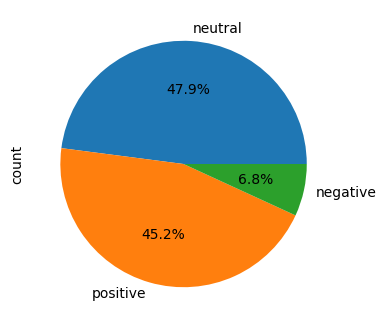

In [35]:
visualize_news_sentiment(naver_news)

# 카카오 정보 탐색/ 요약

## 회사 정보/리뷰 검색

In [8]:
kakao_info = comp_info.get_company_info('카카오')

kakao_news, kakao_reviews, kakao_review_summarized_dict = kakao_info

## 긍정/ 부정 리뷰 한줄 요약

In [13]:
kakao_review_summarized_dict['good_summarise_long']

'회사에서 업무를 주도적으로 할 수 있을까?'

In [15]:
kakao_review_summarized_dict['bad_summarise_long']

'회사에 따라 성과급이 높은 것으로 알려졌다.'

## 최근 기사 링크/ 기사요약/ 기사 평가

In [11]:
kakao_news[['link', 'summarized', 'sentiment']].head(10)

,link,summarized,sentiment
0,http://v.daum.net/v/20230707043459720,"틱비즈(웹툰, 모빌리티)의 성장률이 4년 만에 최대 규모로 감소했다.",negative
1,http://v.daum.net/v/20230707102456044,카카오모빌리티가 7일(현지시간) 지하 주차장 내에서 위치 확인을 받는 서비스를 선보였다.,neutral
2,http://v.daum.net/v/20230707102425035,한정 테슬라 주식 거래에 대한 매매 수수료 무료행사가 시작됐다.,neutral
3,http://v.daum.net/v/20230707100128096,신종 코로나바이러스 감염증(코비드) 팬데믹 이후 최대 규모의 새마을금고 연체액 12조 원,neutral
4,http://v.daum.net/v/20230707100420226,카카오모빌리티가 다음주 서울 코엑스 주차장에서 실내지도 서비스를 선보인다.,neutral
5,http://v.daum.net/v/20230707101815816,"넷마블(MNB, 제일제당)가 올해 7월 열리는 복날을 개최한다.",neutral
6,http://v.daum.net/v/20230707100732367,카카오페이증권이 테슬라 주식 매매 수수료 무료 혜택을 제공한다.,neutral
7,http://v.daum.net/v/20230707100902425,카카오가 지난 2분기 실적이 예상치를 하회할 것이라고 밝혔다.,negative
8,http://v.daum.net/v/20230707082405579,유안타증권이 카카오의 2분기 매출액 1조 8378억원(전년 동기를 대비 -32%)를...,positive
9,http://v.daum.net/v/20230707072801522,카카오의 2분기 매출과 영업이익은 1조900억원에 이르렀다.,positive


## 긍정/부정/중립 기사 비율 시각화

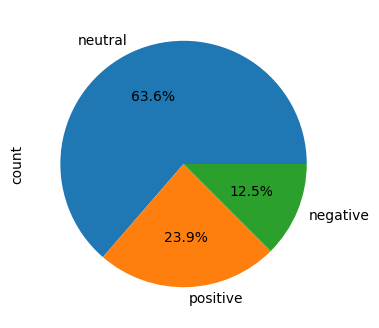

In [37]:
visualize_news_sentiment(kakao_news)